In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import keras
import matplotlib.pyplot as plt

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Import custom functions from other notebooks
sys.path.append("myfun/")
from ipynb.fs.full.myfun_nn import *
from ipynb.fs.full.myfun_model_nn import *
from ipynb.fs.full.myfun_model_linlog import *

2024-02-13 12:19:20.711556: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 12:19:20.711581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 12:19:20.712351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 12:19:20.717793: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 12:19:21.433401: W tensorflow/compiler/tf2

# Relationship btw consecutive distances and predicted velocities

In [2]:
Nx = 100
Nt = 100
T = 0.5

In [3]:
# # Space
# rng = np.random.default_rng(12345)
# a = rng.uniform(-1, 0, int(Nx/3)+1)
# b = rng.uniform(0, 1, 2*int(Nx/3))

# my_rnd = np.concatenate([a, b])

# # Check if sorted
# if all(my_rnd[i] <= my_rnd[i+1] for i in range(len(my_rnd) - 1)):
#     print("All the vehicles are sorted")
#     X = m_rnd
# else:
#     print("There's at least a vehicle not sorted")
#     X = my_rnd.copy()
#     X.sort()

A = np.linspace(-1,0,int(Nx/3)+1)
B = np.linspace(0,1,2*int(Nx/3))

X = np.concatenate([A,B])

# Consecutive distances of vehicles in this scene
cons_dis = np.diff(X, axis=0)  


# Time
tspan = np.linspace(0,T,Nt)

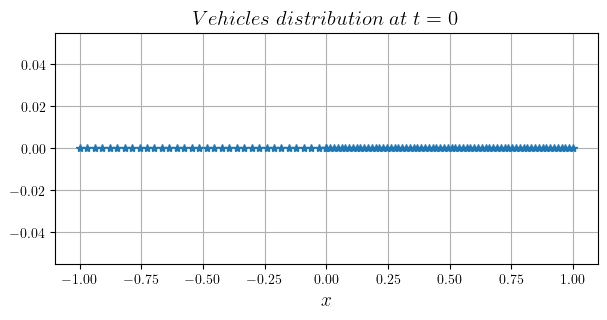

In [4]:
# Create a figure and axis for the plot
width, height = 7, 3
fig, ax = plt.subplots(figsize=(width, height))

# Plot the true and simulated trajectories for each vehicle
ax.plot(X,X*0, marker="*", linestyle='None') # there's no car in front of the leading one

ax.set_xlim([-1.1,1.1])

ax.set_xlabel("$x$", fontsize=14)
# ax.set_ylabel("$vel$", fontsize=14)
ax.set_title(fr"$Vehicles\ distribution\ at\ t=0$", fontsize=15)

plt.grid()
plt.show()

## Lin/Log model

In [5]:
t = 0
N = len(X)
L = 0.1*np.mean(cons_dis)
v0 = 30
# flag = 'Log'

In [6]:
vel_lin = TD_LWR_model(t, X, N, v0, L, 'Lin')
vel_log = TD_LWR_model(t, X, N, v0, L, 'Log')

myfun/myfun_model_linlog.ipynb:31: RuntimeWarning: divide by zero encountered in scalar divide
  "import scipy.optimize as optimize\n",
myfun/myfun_model_linlog.ipynb:33: RuntimeWarning: divide by zero encountered in log
  "from ipynb.fs.full.myfun_model_usefulfuns import *\n",


In [7]:
L, vel_lin, vel_log

(0.0020202020202020206,
 array([28.        , 28.        , 28.        , 28.        , 28.        ,
        28.        , 28.        , 28.        , 28.        , 28.        ,
        28.        , 28.        , 28.        , 28.        , 28.        ,
        28.        , 28.        , 28.        , 28.        , 28.        ,
        28.        , 28.        , 28.        , 28.        , 28.        ,
        28.        , 28.        , 28.        , 28.        , 28.        ,
        28.        , 28.        , 28.        ,  0.        , 26.06060606,
        26.06060606, 26.06060606, 26.06060606, 26.06060606, 26.06060606,
        26.06060606, 26.06060606, 26.06060606, 26.06060606, 26.06060606,
        26.06060606, 26.06060606, 26.06060606, 26.06060606, 26.06060606,
        26.06060606, 26.06060606, 26.06060606, 26.06060606, 26.06060606,
        26.06060606, 26.06060606, 26.06060606, 26.06060606, 26.06060606,
        26.06060606, 26.06060606, 26.06060606, 26.06060606, 26.06060606,
        26.06060606, 26.060

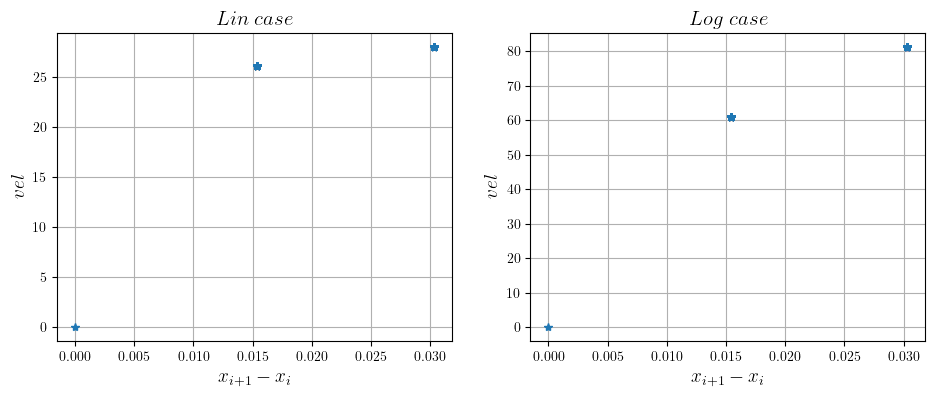

In [8]:
# Create a figure and axis for the plot
width, height = 14, 5
fig, ax = plt.subplots(1,2,figsize=(width*.8, height*.8))

titles = [fr"$Lin\ case$", fr"$Log\ case$"]
vels = [vel_lin, vel_log]

for (title,vel,ax) in zip(titles,vels,ax.ravel()):

    # Plot the true and simulated trajectories for each vehicle
    ax.plot(cons_dis,vel[:-1], marker="*", linestyle='None') # there's no car in front of the leading one

    ax.set_xlabel("$x_{i+1} - x_{i}$", fontsize=14)
    ax.set_ylabel("$vel$", fontsize=14)
    ax.set_title(title, fontsize=15)
    ax.grid()
    
plt.show()

## NN model

In [9]:
# Load the model
dir_nn2 = "2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

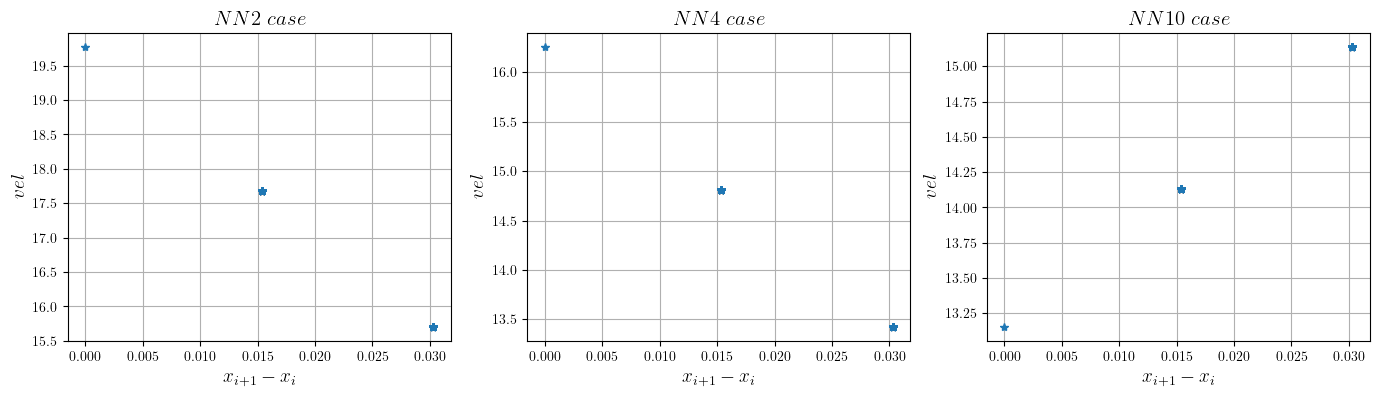

In [10]:
dir_all_nn = [dir_nn2, dir_nn4, dir_nn10]
namefile_model_all_nn = ["/model_nn2.keras", "/model_nn4.keras", "/model_nn10.keras"]

# Create a figure and axis for the plot
width, height = 21, 5
fig, ax = plt.subplots(1,3,figsize=(width*.8, height*.8))

titles = [fr"$NN2\ case$", fr"$NN4\ case$", fr"$NN10\ case$"]

for dir_nn, namefile_model_nn,ax,title in zip(dir_all_nn, namefile_model_all_nn, ax.ravel(),titles):
    
    # Load the model
    path = "./out/" + dir_nn
    model_nn = keras.models.load_model(path + namefile_model_nn)
    
    ## Compute the velocities
    y_pred = model_nn(cons_dis, training=False)

    ## Approximate the velocity of the leading car ?
    v0 = y_pred.numpy().mean()

    vel_nn = y_pred.numpy().flatten().tolist() + [v0]

    # check
    if all(i >= v0 for i in y_pred):
        print("There is at least a vehicle faster than the leading car")   

    # Plot
    ax.plot(cons_dis,vel_nn[:-1], marker="*", linestyle='None') # there's no car in front of the leading one

    ax.set_xlabel("$x_{i+1} - x_{i}$", fontsize=14)
    ax.set_ylabel("$vel$", fontsize=14)
    ax.set_title(title, fontsize=15)
    ax.grid()
    
plt.show()

## New NN models

In [11]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-12-04_18-15-30_df8-9_15it_0.33ts
2023-12-08_18-44-13_df8-9_500it_0.33ts
2023-12-09_18-32-28_df1-2-3-4-5-6-7-8-9-10_1it-PRE-nn2
2023-12-09_18-40-50_df1-2-3-4-5-6-7-8-9-10_1it-PRE-nn2
2023-12-09_21-54-43_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-12-10_01-23-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-12-10_11-38-47_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10
2023-12-21_17-19-18_df1-2-3-4-5-6-7-8-9-10-PRE-LINLOG
2023-12-21_17-39-01_all
2023-12-21_17-41-28_500it-PRE-nn-all
2023-12-25_10-54-47_500it-PRE-nn-all
2024-02-08_20-26-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]
2024-02-08_21-08-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 1, 1, 1]
2024-02-08_22-07-40_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 2, 1]
2024-02-09_13-34-19_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]
2024-02-12_21-00-49_v0comparison
2024-02-13_03-43-15_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 1, 1, 1]
2024-02-13_09-28-45_v0comparison
old


In [12]:
# Load the model
dir1 = "2024-02-08_20-26-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]"
# dir1 = "2024-02-09_13-34-19_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 1]"
dir2 = "2024-02-08_21-08-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 1, 1, 1]"
dir3 = "2024-02-08_22-07-40_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn[1, 2, 2, 2, 1]"

In [13]:
dir_newnn = [dir1, dir2, dir3]
namefile_newnn = ["/model_nn.keras"]*len(dir_newnn)
titles_newnn = [fr"$NN\ [1-2-2-1]\ case$", fr"$NN4\ [1-1-1-1]\ case$", fr"$NN\ [1-2-2-2-1]\ case$"]

There is at least a vehicle faster than the leading car


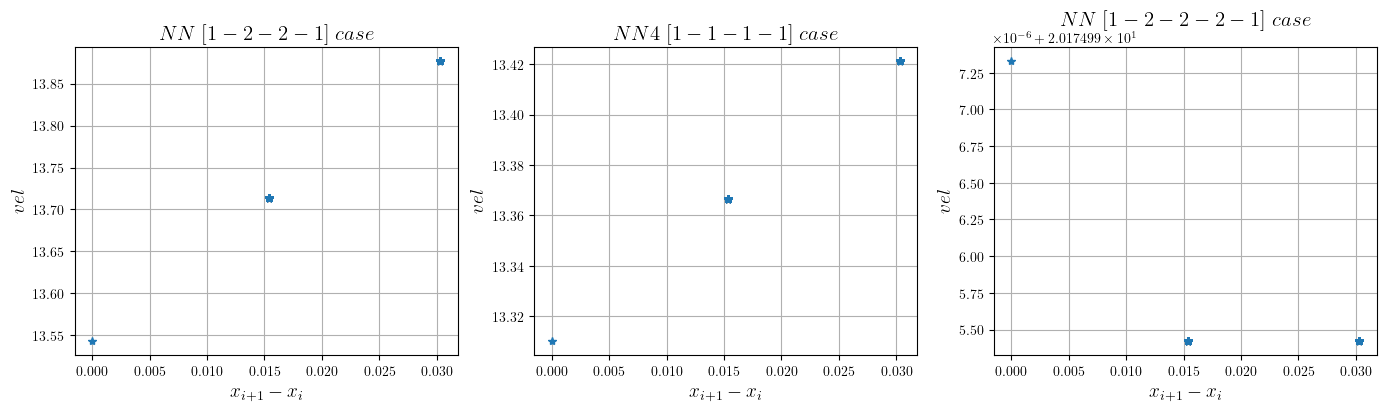

In [14]:
# Create a figure and axis for the plot
width, height = 21, 5
fig, ax = plt.subplots(1,3,figsize=(width*.8, height*.8))

for dir_nn, namefile,ax,title in zip(dir_newnn, namefile_newnn, ax.ravel(),titles_newnn):
    
    # Load the model
    path = "./out/" + dir_nn
    model_nn = keras.models.load_model(path + namefile)
    
    ## Compute the velocities
    y_pred = model_nn(cons_dis, training=False)

    ## Approximate the velocity of the leading car ?
    v0 = y_pred.numpy().mean()

    vel_nn = y_pred.numpy().flatten().tolist() + [v0]

    # check
    if all(i >= v0 for i in y_pred):
        print("There is at least a vehicle faster than the leading car")   

    # Plot
    ax.plot(cons_dis,vel_nn[:-1], marker="*", linestyle='None') # there's no car in front of the leading one

    ax.set_xlabel("$x_{i+1} - x_{i}$", fontsize=14)
    ax.set_ylabel("$vel$", fontsize=14)
    ax.set_title(title, fontsize=15)
    ax.grid()
    
plt.show()